# Chapter IV WWW

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## How to get data from The Laboratoty for Web Algorithmics (http://law.di.unimi.it/)

### This is the page with the datasets: http://law.di.unimi.it/datasets.php

#### It is possible to download a network in a WebGraph format that is a compressed binary format. The project provides various clients to extract the network strcture, in Java, C++ and in Python, py-web-graph: http://webgraph.di.unimi.it/.

#### In particular we got the graph and the related urls associated to each node of the .eu domain in the year 2005: http://law.di.unimi.it/webdata/eu-2005/ . We exctracted the graph in a form of an edge list and we also got the file with the list of urls in the same order of the node_id

In [2]:
!head ./data/eu-2005.urls

http://de.osha.eu.int/de/gfx/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/print/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php


In [3]:
!head ./data/eu-2005_1M.arcs

0	0
0	1
1	1
2	2
2	3
3	3
4	4
4	5
5	5
6	6


In [4]:
import networkx as nx
 
#defining the eu directed graph
eu_DG=nx.DiGraph()
#retrieve just the portion of the first 1M edges of the .eu domain 
#crawled in 2005
eu_DG=nx.read_edgelist('./data/eu-2005_1M.arcs', \
                       create_using=nx.DiGraph())
#generate the dictionary of node_is -> urls
file_urls=open('./data/eu-2005.urls')
count=0
dic_nodid_urls={}
while True:
    next_line=file_urls.readline()
    if not next_line:
        break
    next_line[:-1]
    dic_nodid_urls[str(count)]=next_line[:-1]
    count=count+1  
file_urls.close()

#generate the strongly connected component
scc=[(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (eu_DG), key=len, reverse=True)][0][1]
eu_DG_SCC = eu_DG.subgraph(scc)

## Retrieving data through the  [Twitter API](https://dev.twitter.com/docs) usign the module [Twython](http://twython.readthedocs.org/en/latest/)

In [7]:
#To get your own KEYS and TOKENS visit the following page:
#https://dev.twitter.com/docs/auth/tokens-devtwittercom 
#(you have to sign in before with your Twitter account)

from twython import Twython

# put the credentials of @your_account
APP_KEY='vxcStSP88tL77rpBSLa9IMoIr'
APP_SECRET='7EP7CTDzN6mzvSv1s0JJo2WrHowFP6MyEe9F27aCbLNbrlWdZR'
OAUTH_TOKEN='14489299-9SfKo957lp3a13f7HNAbufv6084VTMwT70OHJv5er'
OAUTH_TOKEN_SECRET='wBPOdudXfZ9Pf9swb2rkXYSWBSmyo4VdUr83IodPhX6TZ'

#this will be the handle to connect with Twitter
twitter_connection=Twython(APP_KEY, APP_SECRET, \
                           OAUTH_TOKEN,OAUTH_TOKEN_SECRET)

### How to get the timeline

In [8]:
#the following tweets and query results
#depend on the KEYS and TOKENS of the user

res=twitter_connection.get_home_timeline()
for t in res[:5]:
    #print the text of the first 5 tweets of the actual timeline
    print 'Text of the tweet:',t[u'text']
    #for each tweet print the mentioned users
    print 'mentions:',
    for m in t[u'entities'][u'user_mentions']:
        print m[u'screen_name'],
    print '\r'

Text of the tweet: RT @GewoonRobbert: De koning in mijn hometown, tof 👑 https://t.co/cVFvnI01Yz
mentions: GewoonRobbert 
Text of the tweet: RT @GewoonRobbert: 😍☀️ https://t.co/E2JOOOiygK
mentions: GewoonRobbert 
Text of the tweet: RT @NASAEarth: Tuscaloosa Tornado Track Fades https://t.co/l6cVJKwRVH #NASA https://t.co/mEFTQDGCuR
mentions: NASAEarth 
Text of the tweet: RT @Dunja_Mijatovic: Gunman attacks Turkey journalist Can Dundar outside court - BBC News https://t.co/1Z2ZYV40dh
mentions: Dunja_Mijatovic 
Text of the tweet: That's funny -- I have the opposite expectation. I really dislike when sites don't embed things.

https://t.co/lZ02MYfFCg
mentions: 


### How to get user information

In [9]:
res=twitter_connection.show_user(screen_name='@BarackObama')
print res
print 'location: ',res[u'location']
print 'number of followers: ',res['followers_count']

{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': True, u'profile_text_color': u'333333', u'default_profile_image': False, u'id': 813286, u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/451819093436268544/kLbRvwBg.png', u'verified': True, u'profile_location': None, u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/451007105391022080/iu1f7brY_normal.png', u'profile_sidebar_fill_color': u'C2E0F6', u'entities': {u'url': {u'urls': [{u'url': u'http://t.co/O5Woad92z1', u'indices': [0, 22], u'expanded_url': u'http://www.barackobama.com', u'display_url': u'barackobama.com'}]}, u'description': {u'urls': []}}, u'followers_count': 74525378, u'profile_sidebar_border_color': u'FFFFFF', u'id_str': u'813286', u'profile_background_color': u'77B0DC', u'listed_count': 215011, u'status': {u'contributors': None, u'truncated': False, u'text': u'The economy added 160,000 jobs in April\u2014a record-breaki

### Retrieving [tweets](https://dev.twitter.com/docs/platform-objects/tweets) with the '[search](https://dev.twitter.com/docs/api/1.1/get/search/tweets)' function ([parameter q](https://dev.twitter.com/docs/using-search))

In [10]:
res=twitter_connection.search(q='#ebola', count=2)
for t in res['statuses']:
    print "Text of the tweet:",t[u'text']

Text of the tweet: What The #Ebola Crisis Can Teach Us About How To Fix Flint &amp; #Zika via @FortuneMagazine https://t.co/eL3eOnrQaN
Text of the tweet: Good bye to gorgeous Mama Salone! Next stop: #Liberia #ebola recovery continues #westafrica https://t.co/tkgUnF6Blw


## Getting Wikipedia data

In [12]:
#You can skip the following cell if you don't have mysql installed 
#and use directly the filesscwiki_edgelist.dat and 
#scwiki_page_titles.dat you will find in the 'data' directory
 
#open the DB connection
#the scwiki mysql dumps scwiki-20151102-pagelinks.sql and 
#scwiki-20151102-page.sql (both in the 'data' dir) have to be loaded 
#in the tables "pagelinks" and "page" of the DB "scwiki_db" (to be
#created) before to launch this procedure through these commands:
#mysql -u<user> -p<password> scwiki_db< scwiki-20151102-pagelinks.sql
#mysql -u<user> -p<password> scwiki_db< scwiki-20151102-page.sql

import _mysql

scwiki_db=_mysql.connect(host="localhost",user="root", \
                         passwd="mumonkan",db="scwiki_db")

#extract the hyperlinks information with a SQL query 
#from the mysql DB and storing them in a local file
scwiki_db.query("""SELECT pagelinks.pl_from, page.page_id 
FROM page,pagelinks 
WHERE page.page_title=pagelinks.pl_title""")
r=scwiki_db.use_result()
f=open("./data/scwiki_edgelist.dat",'w')
res=r.fetch_row()
while res!=():
    f.write(res[0][0]+" "+res[0][1]+"\n")
    res=r.fetch_row()
f.close()

#extract the title information with a SQL query 
#from the mysql DB and storing them in a local file
scwiki_db.query("SELECT page.page_id,page.page_title FROM page")
r=scwiki_db.use_result()
f=open("./data/scwiki_page_titles.dat",'w')
res=r.fetch_row()
while res!=():
    f.write(res[0][0]+" "+res[0][1]+"\n")
    res=r.fetch_row()
f.close()

## Hits algorithm

### Test Graph

{'A': 0.31622776601683794, 'C': 0.31622776601683794, 'B': 0.6324555320336759, 'D': 0.6324555320336759}
{'A': 0.7302967433402215, 'C': 0.5477225575051661, 'B': 0.18257418583505539, 'D': 0.36514837167011077}


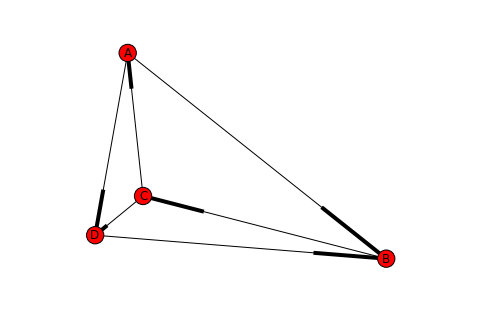

In [13]:
def HITS_algorithm(DG):
    auth={}
    hub={}

    k=1000 #number of steps

    for n in DG.nodes():
        auth[n]=1.0
        hub[n]=1.0

    for k in range(k):
        norm=0.0
        for n in DG.nodes():
            auth[n]=0.0
            for p in DG.predecessors(n):
                auth[n]+=hub[p]
            norm+=auth[n]**2.0
        norm=norm**0.5
        for n in DG.nodes():
            auth[n]=auth[n]/norm

        norm=0.0
        for n in DG.nodes():
            hub[n]=0.0
            for s in DG.successors(n):
                hub[n]+=auth[s]
            norm+=hub[n]**2.0  
        norm=norm**0.5
        for n in DG.nodes():
            hub[n]=hub[n]/norm
        
        return auth,hub

DG=nx.DiGraph()

DG.add_edges_from([('A','B'),('B','C'),('A','D'), \
                   ('D','B'),('C','D'),('C','A')])

#plot the graph
nx.draw(DG,with_labels=True)

(auth,hub)=HITS_algorithm(DG)

print auth
print hub

### Adjacency matrix representation with basic operations

In [14]:
def matrix_transpose(M):
    M_out=[]
    for c in range(len(M[0])):
        M_out.append([])
        for r in range(len(M)):
            M_out[c].append(M[r][c])
    return M_out
            

def matrix_multiplication(M1,M2):
    M_out=[]
    for r in range(len(M1)):
        M_out.append([])
        for j in range(len(M2[0])):
            e=0.0
            for i in range(len(M1[r])):
                e+=M1[r][i]*M2[i][j]
            M_out[r].append(e)
    return M_out
            

adjacency_matrix1=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0]
                  ]

adjacency_matrix2=matrix_transpose(adjacency_matrix1)

print "Transpose adjacency matrix:",adjacency_matrix2

res_mul=matrix_multiplication(adjacency_matrix1,adjacency_matrix2)

print "Matrix multiplication:",res_mul


Transpose adjacency matrix: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 0]]
Matrix multiplication: [[2.0, 1.0, 1.0], [1.0, 3.0, 0.0], [1.0, 0.0, 1.0]]


### Power iteration algorithm

In [15]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]
vector=[
        [0.21],
        [0.34],
        [0.52],
        [0.49]
        ]

for i in range(100): #100 iterations is enough for the convergence!
    res=matrix_multiplication(adjacency_matrix,vector)
    norm_sq=0.0
    for r in res:
        norm_sq=norm_sq+r[0]*r[0]
    vector=[]
    for r in res:
         vector.append([r[0]/(norm_sq**0.5)])
    
print "Maximum eigenvalue (in absolute value):",norm_sq**0.5
print "Eigenvector for the maximum eigenvalue:",vector


Maximum eigenvalue (in absolute value): 2.17008648663
Eigenvector for the maximum eigenvalue: [[0.5227207256439814], [0.6116284573553772], [0.2818451988548684], [0.5227207256439814]]


### Computing the HITS algorithm onto the WWW strongly connected component of the .eu domain

In [16]:
import operator

(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key=operator.itemgetter(1))
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1))

#top ranking auth
print "Top 5 auth"
for p in sorted_auth[:5]:
    print dic_nodid_urls[p[0]],p[1]
    
#top ranking hub
print "\nTop 5 hub"
for p in sorted_hub[:5]:
    print dic_nodid_urls[p[0]],p[1]

Top 5 auth
http://www.etf.eu.int/WebSite.nsf/968a6d6b85b25f2ac1256aea002ccb2a/c1256c610033f312c1256bd80047617c?OpenDocument 9.67426387995e-05
http://www.etf.eu.int/website.nsf/Pages/Job+vacancies?OpenDocument&LAN=EN&CNTDSP=3&EMB=..%2F..%2FLongList.nsf%2Fceiweb%2FB56B214E8DC96005C1256F8C00385DD4?openDocument&calltype=Recruitment&LAN=EN&LAN=EN 9.67426387995e-05
http://www.etf.eu.int/WebSite.nsf/(tenders_list)/3F1E0AF68305330DC1256F8C000B094C?OpenDocument&LAN=EN 9.67426387995e-05
http://europa.eu.int/eures/main.jsp?acro=lw&parentId=0&catId=490&lang=el&countryId=LV 9.67426387995e-05
http://europa.eu.int/eures/main.jsp?acro=lw&parentId=0&catId=490&lang=el&countryId=DE 9.67426387995e-05

Top 5 hub
http://www.etf.eu.int/ 7.65711101121e-07
http://ue.eu.int/cms3_fo/showPage.asp?id=580&lang=pt&mode=g 7.65711101121e-07
http://ue.eu.int/showPage.asp?id=357&lang=pt 7.65711101121e-07
http://ue.eu.int/showPage.asp?id=370&lang=pt&mode=g 7.65711101121e-07
http://www.europarl.eu.int/interp/public/defaul

## Compute the PageRank

In [17]:
def pagerank(graph, damping_factor=0.85, max_iterations=100, 
min_delta=0.00000001):
    
    nodes = graph.nodes()
    graph_size = len(nodes)
    if graph_size == 0:
        return {}
    
    # itialize the page rank dict with 1/N for all nodes
    pagerank = dict.fromkeys(nodes, (1.0-damping_factor)*1.0/ \
                             graph_size)
    min_value=(1.0-damping_factor)/len(nodes)
    
    for i in range(max_iterations):
        diff = 0 #total difference compared to last iteraction
        # computes each node PageRank based on inbound links
        for node in nodes:
            rank = min_value
            for referring_page in graph.predecessors(node):
                rank += damping_factor * pagerank[referring_page]/ \
                len(graph.neighbors(referring_page))
            diff += abs(pagerank[node] - rank)
            pagerank[node] = rank
        
        #stop if PageRank has converged
        if diff < min_delta:
            break
    
    return pagerank

## PageRank for a test Network (and with [Networkx](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html))

{1: 0.17359086186340225, 2: 0.33260446516778386, 3: 0.3202137953926163, 4: 0.17359086304186191}
{1: 0.17359061775974502, 2: 0.33260554622228633, 3: 0.3202132182582236, 4: 0.17359061775974502}


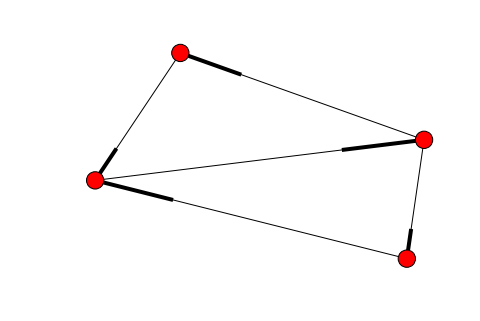

In [18]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(2,3),(3,4),(3,1),(4,2)])
#plot the network
nx.draw(G)

#our Page Rank algorithm
res_pr=pagerank(G,max_iterations=10000,min_delta=0.00000001, \
                damping_factor=0.85)
print res_pr

#Networkx Pagerank function
print nx.pagerank(G,max_iter=10000)

## Generate and plot the Twitter Mention Network

User Screen Name and Id: (u'ccsmugglers', u'74411505')
List of Mentions: (u'risual', u'82709115') 
[u'74411505', u'82709115']


User Screen Name and Id: (u'nlahana20', u'2910218898')
List of Mentions: (u'kboyceq', u'768449173') (u'PineyElem', u'2899577137') (u'codeorg', u'850107536') 
[u'2910218898', u'768449173', u'2899577137', u'850107536']


User Screen Name and Id: (u'PineyElem', u'2899577137')
List of Mentions: (u'kboyceq', u'768449173') (u'PineyElem', u'2899577137') (u'codeorg', u'850107536') 
[u'2899577137', u'768449173', u'850107536']


User Screen Name and Id: (u'bquentin3', u'768482730')
List of Mentions: (u'kboyceq', u'768449173') (u'PineyElem', u'2899577137') (u'codeorg', u'850107536') 
[u'768482730', u'768449173', u'2899577137', u'850107536']


User Screen Name and Id: (u'kboyceq', u'768449173')
List of Mentions: (u'PineyElem', u'2899577137') (u'codeorg', u'850107536') 
[u'768449173', u'2899577137', u'850107536']


User Screen Name and Id: (u'AnnickVdz', u'413153322')
List

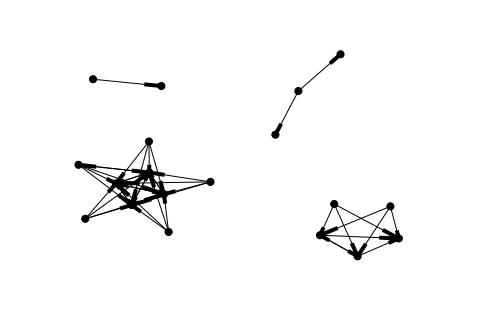

In [19]:
def generate_network(list_mentions):
    DG=nx.DiGraph()
    for l in list_mentions:
        if len(l)<2: continue
        for n in l[1:]:
             if not DG.has_edge(l[0],n):
                DG.add_edge(l[0],n, weight=1.0 )
        else:
                DG[l[0]][n]['weight']+=1.0
    return DG

#extracting user and mentions for each tweet
res=twitter_connection.search(q='#FutureDecoded', count=5000)
#the first will be the tweer user
list_users={}
list_mentions=[]
for t in res['statuses']:
    list_unique_ids=[]
    print "User Screen Name and Id:",(t[u'user'][u'screen_name'], \
                                      t[u'user'][u'id_str'])
    list_unique_ids.append(t[u'user'][u'id_str'])
    if not list_users.has_key(t[u'user'][u'id_str']):
        list_users[t[u'user'][u'id_str']]=t[u'user'][u'screen_name']
    print "List of Mentions:",
    for m in t[u'entities'][u'user_mentions']:
        if m['id_str']!=t[u'user'][u'id_str']:
                list_unique_ids.append(m['id_str'])
                if not list_users.has_key(m['id_str']):
                    list_users[m['id_str']]=m[u'screen_name']
        print (m[u'screen_name'],m['id_str']),
    print "\r"
    print list_unique_ids
    list_mentions.append(list_unique_ids)
    print "\n"            

net_mentions=generate_network(list_mentions) 



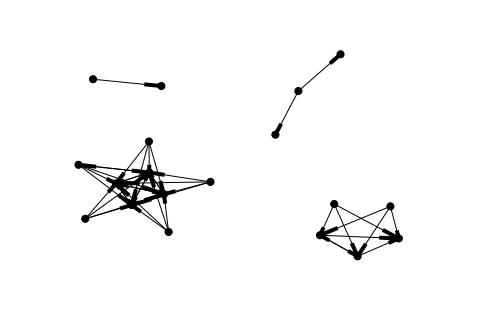

In [21]:
#plotting the network
pos=nx.graphviz_layout(net_mentions,prog='neato')
nx.draw(net_mentions, pos, node_size = 50, node_color='Black')
savefig('./data/hashtag_discussion_thread.png',dpi=600)

### Top Pageranks on the Twitter generated Network (influencers)

In [22]:
pr=nx.pagerank(net_mentions,max_iter=10000)
sorted_pr=sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
#top10 pagerank twitter user from the selected search
for page in sorted_pr[:10]:
    print list_users[page[0]],page[1]

StevenVBe 0.217179433016
rikvera 0.181666590109
hinssen 0.158745904989
nexxworks 0.132991715043
codeorg 0.0534475729015
dilam77 0.0387604069229
PineyElem 0.0258980751078
kboyceq 0.0258980751078
risual 0.0240956188316
DeepFat 0.020405264004


## Code for the GN algorithm ([networkx betweenness](http://networkx.lanl.gov/reference/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality))

deleting edge: ('E', 'F') ...we have now  2  components
deleting edge: ('B', 'E') ...we have now  2  components
deleting edge: ('D', 'I') ...we have now  2  components
deleting edge: ('D', 'H') ...we have now  3  components
deleting edge: ('I', 'H') ...we have now  4  components
deleting edge: ('F', 'L') ...we have now  4  components
deleting edge: ('C', 'F') ...we have now  5  components
deleting edge: ('B', 'D') ...we have now  5  components
deleting edge: ('A', 'B') ...we have now  6  components
deleting edge: ('G', 'L') ...we have now  6  components
deleting edge: ('C', 'G') ...we have now  7  components
deleting edge: ('A', 'D') ...we have now  8  components
deleting edge: ('C', 'L') ...we have now  9  components
deleting edge: ('E', 'I') ...we have now  10  components


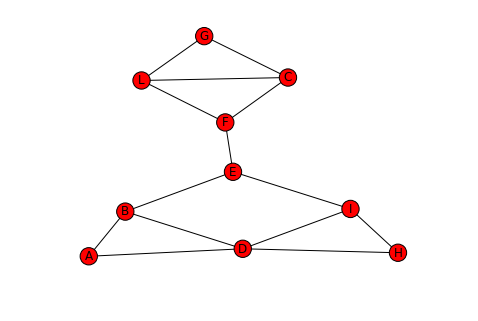

In [23]:
G=nx.Graph()
G.add_edges_from([('A','B'),('A','D'),('B','D'),('B','E'),('E','I'),\
                  ('D','I'),('D','H'),('H','I'),('E','F'),('F','C'),\
                  ('F','L'),('C','L'),('C','G'),('G','L')])

pos=nx.graphviz_layout(G,prog='neato')
                       
nx.draw(G, pos,with_labels=True)

#NOTE: THE ORDER OF EDGES IS DIFFERENT FOR THE FACT THAT MANY
#OF THEM HAVE THE SAME BETWEENNESS VALUE...

sorted_bc=[1]
actual_number_components=1
while not sorted_bc==[]:
    d_edge=nx.edge_betweenness_centrality(G)
    sorted_bc = sorted(d_edge.items(), key=operator.itemgetter(1))
    e=sorted_bc.pop()
    print "deleting edge:", e[0],
    G.remove_edge(*e[0])
    num_comp=nx.number_connected_components(G)
    print "...we have now ",num_comp," components"
    if num_comp>actual_number_components:
        actual_number_components=num_comp
        

## Community Detection with the Karate Club Network

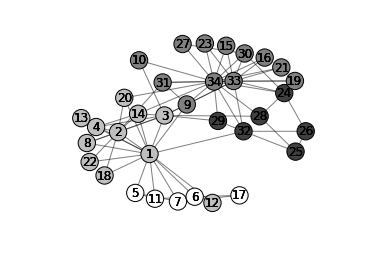

In [25]:
import community

G=nx.read_edgelist("./data/karate.dat")

#first compute the best partition
partition = community.best_partition(G)

#plot the network
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
plt.axis('off')
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() \
                  if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 300, \
                           node_color = str(count / size))
    nx.draw_networkx_labels(G,pos)

nx.draw_networkx_edges(G,pos, alpha=0.5,width=1)
savefig('./data/karate_community.png',dpi=600)

## Community Detection for the scwiki web graph

In [28]:
#load the directed and undirected version og the scwiki graph
scwiki_pagelinks_net_dir=nx.read_edgelist \
("./data/scwiki_edgelist.dat",create_using=nx.DiGraph())
scwiki_pagelinks_net=nx.read_edgelist("./data/scwiki_edgelist.dat")

#load the page titles
diz_titles={}
file_titles=open("./data/scwiki_page_titles.dat",'r')
while True:
    next_line=file_titles.readline()
    if not next_line:
        break
    print next_line.split()[0],next_line.split()[1]
    diz_titles[next_line.split()[0]]=next_line.split()[1]
    
file_titles.close()

14209 "Weird_Al"_Yankovic
13890 ''Assandira''
10258 'O_sole_mio
2361 'Onne
6118 (Sittin'_on)_The_Dock_of_the_Bay
6119 (Sittin'_on)_the_Dock_of_the_Bay
10062 ...altrimenti_ci_arrabbiamo!
11039 1054
11019 1065
16053 1082
11222 1090
12579 1096
11596 1100
16054 1110
16055 1138
11307 113_(nùmeru_de_emerzèntzia)
16056 1166
10560 118_-_Servìtziu_de_emerzèntzia_sanidària
16057 1194
11598 1200
16058 1222
16059 1250
16060 1278
16061 1306
15041 1315
10934 1324
16062 1334
13534 1336
12350 1340
15040 1343
16063 1362
15039 1371
16064 1390
15038 1399
11590 1409
16065 1418
15037 1427
11067 1431
12108 1444
16066 1446
15036 1455
11054 1473
16067 1474
13112 1483
10971 1489
13533 1490
11055 1492
12135 1497
16068 1502
11221 1510
10965 1514
11099 1515
13113 1520
13500 1530
12079 1533
13499 1542
13516 1543
12078 1580
12130 1584
10970 1588
10967 1596
10961 1599
13498 1600
11321 1608
13204 1616
13497 1627
10963 1667
10968 1669
11049 1685
13535 1711
12362 1713
11100 1720
13519 1724
11048 1750
12361 1753
11094 1

## Generate and optimize the representative Network of the Community Structure

In [29]:
#optimization
partition = community.best_partition(scwiki_pagelinks_net)

#Generate representative nodes of the community structure
community_structure=nx.Graph()
diz_communities={}
diz_node_labels={}
diz_node_sizes={}
max_node_size=0
for com in set(partition.values()) :
    diz_communities[com] = [nodes for nodes in partition.keys() \
                            if partition[nodes] == com]
    if len(diz_communities[com])>=200:
        if max_node_size<len(diz_communities[com]):
            max_node_size=len(diz_communities[com])
        print "community",com,len(diz_communities[com]),
        sub_scwiki_dir = scwiki_pagelinks_net_dir.subgraph \
        (diz_communities[com])    
        res_pr=nx.pagerank(sub_scwiki_dir,max_iter=10000)
        sorted_pr=sorted(res_pr.items(), key=operator.itemgetter \
                         (1),reverse=True)
        print diz_titles[sorted_pr[0][0]],sorted_pr[0][1]
        community_structure.add_node(com)
        diz_node_labels[com]=diz_titles[sorted_pr[0][0]]
        diz_node_sizes[com]=len(diz_communities[com])
        
#Generate edge weights according to the number of links 
#among communities
max_edge_weight=0.0
for i1 in range(community_structure.number_of_nodes()-1):
    for i2 in range(i1+1,community_structure.number_of_nodes()):
        wweight=0.0
        for n1 in diz_communities[community_structure.nodes()[i1]]:
            for n2 in diz_communities[community_structure.nodes() \
                                      [i2]]:
                if scwiki_pagelinks_net.has_edge(n1,n2):
                    wweight=wweight+1.0
        if wweight>100.0:
            if max_edge_weight<wweight:
                max_edge_weight=wweight
            community_structure.add_edge(community_structure. \
            nodes()[i1],community_structure.nodes()[i2], \
                                         weight=wweight)

community 0 2012 Logudoresu 0.0507648029074
community 1 1812 Wikipedia 0.0498390890911
community 2 861 Classificatzione_sientìfica 0.0358451735252
community 3 795 Babel 0.0296037336974
community 4 662 Sardigna 0.0403623149927
community 5 393 Nugoresu 0.0781774191072
community 6 1939 Limba_Sarda_Comuna 0.0219626233778
community 8 201 Rabascius 0.053309971387
community 22 223 Casteddu 0.0197102893607


## Plotting the representative Community Structure

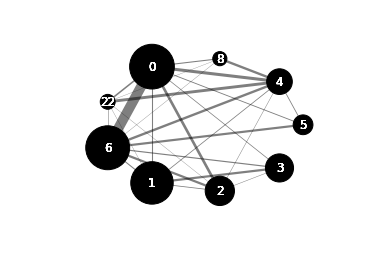

In [30]:
pos=nx.graphviz_layout(community_structure,prog='circo')
node_size_factor=2000.0
edge_weight_factor=10.0

plt.axis('off')

for n in community_structure.nodes():
    nx.draw_networkx_nodes(community_structure, pos, [n], node_size\
                           = node_size_factor*diz_node_sizes[n]/ \
                           max_node_size, node_color='Black')
    nx.draw_networkx_labels(community_structure,pos, font_color= \
                            'White',axis='off')

for e in community_structure.edges():
    nx.draw_networkx_edges(community_structure,pos,[e],alpha=0.5, \
                           width=edge_weight_factor* \
                           community_structure[e[0]][e[1]]['weight']\
                           /max_edge_weight)